# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/Neglecting_nonlinearity_for_W/'
base_directory_figure_str =  base_directory_str + '/figures/Neglecting_nonlinearity_for_W/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch



def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cuda


# Load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )








str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )





In [ ]:

batch_size = 1000


train_loader50_shuffle , test_loader50_shuffle , code_map50_shuffle , x_shape50_shuffle   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = True )


train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = False )





Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



# Single run function

In [ ]:





def calculate_alignment_term_o_l_k_no_last_delta( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l    ):


  k=-1

  return calculate_alignment_term_no_last_delta( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = b_l[l]  ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = B_l[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] 
                                  ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] 
                                  )




def calculate_alignment_term_no_last_delta( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k    ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 



  return alignment_term_o_l_k


  







def calculate_alignment_term_o_l_k( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l   , eta_2 ):


  k=-1

  return calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = b_l[l]  ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = B_l[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )




def calculate_alignment_term( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k








def calculate_last_term_l_no_last_delta(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l      ):

  

   return calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]    )



def calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k     ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return  func( zeta_k_l_k.t()  )    






def calculate_last_term_l(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l  ,  delta_k_l  , eta  ):

  

   return calculate_last_term(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]  ,  delta_lp1_k = delta_k_l[-1][l+1]  , eta = eta  )



def calculate_last_term(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k  ,  delta_lp1_k  , eta  ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return torch.matmul(   func( zeta_k_l_k.t()  )    ,   delta_lp1_k  ) * eta






In [ ]:





def calculate_alignment_term_o_l_k_no_last_delta_linear( o , l  ,  L_k_l       ,   B_l  ,  delta_k_l    ):


  k=-1

  return calculate_alignment_term_no_last_delta_linear(     B_l  = B_l[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] 
                                  ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] 
                                  )




def calculate_alignment_term_no_last_delta_linear(     B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k    ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )


  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

 



 



  return alignment_term_o_l_k


  







def calculate_alignment_term_o_l_k_linear( o , l   ,  L_k_l    ,   B_l  ,  delta_k_l   , eta_2 ):


  k=-1

  return calculate_alignment_term(     B_l  = B_l[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )




def calculate_alignment_term_linear(   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )






 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k








def calculate_last_term_l_no_last_delta(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l      ):

  

   return calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]    )



def calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k     ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return  func( zeta_k_l_k.t()  )    






def calculate_last_term_l(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l  ,  delta_k_l  , eta  ):

  

   return calculate_last_term(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = b_l[l]  ,  delta_lp1_k = delta_k_l[-1][l+1]  , eta = eta  )



def calculate_last_term(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k  ,  delta_lp1_k  , eta  ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return torch.matmul(   func( zeta_k_l_k.t()  )    ,   delta_lp1_k  ) * eta






In [ ]:


def Single_run_function(str_dir_data_BASE , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            ,  N_epoch = 30
           ):



  batch_size = 1000

  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )


  N_hidden = len(code_map[0][0])



  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"


  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"

  angle_W_B = torch.tensor([])
  angle_dW_B = torch.tensor([])

  angle_W_B_Linear = torch.tensor([])
  angle_dW_B_Linear = torch.tensor([])

  angle_W_randomB = torch.tensor([])
  angle_dW_randomB = torch.tensor([])

  test_accuracy = torch.tensor([])



  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    try:

      str_direction = str_dir_data_BASE_exp + "Save_dict" +  ".txt"
      with open( str_direction , "rb") as fp:   #Pickling
        Save_dict = CPU_Unpickler(fp).load()




        angle_W_B = torch.cat(  [ Save_dict["angle_W_B"] , angle_W_B]  )
        angle_W_B = torch.cat(  [ Save_dict["angle_dW_B"] , angle_W_B]  )

        angle_W_B_Linear = torch.cat(  [ Save_dict["angle_W_B_Linear"] , angle_W_B_Linear ]  )
        angle_W_B_Linear = torch.cat(  [ Save_dict["angle_dW_B_Linear"] , angle_W_B_Linear ]  )

        angle_W_randomB = torch.cat(  [ Save_dict["angle_W_randomB"] , angle_W_randomB ]  )
        angle_W_randomB = torch.cat(  [ Save_dict["angle_dW_randomB"] , angle_W_randomB ]  )

        test_accuracy = torch.cat(  [ Save_dict["test_accuracy"] , test_accuracy ]  )
    except :
      None

    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)





  

  if save_details == True :

    Save_dict = {
        
      "angle_W_B":  torch.cat(  [      torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence   ]  )  , angle_W_B   ]  , dim=1)   ,
      "angle_dW_B":  torch.cat(  [      torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence   ]  )  , angle_dW_B   ]  , dim=1)   ,

      "angle_W_B_Linear": torch.cat(  [  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )  , angle_W_B_Linear  ], dim=1)    ,
      "angle_dW_B_Linear": torch.cat(  [  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )  , angle_dW_B_Linear  ], dim=1)    ,


      "angle_W_randomB": torch.cat(  [  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )   , angle_W_randomB  ], dim=1)   ,
      "angle_dW_randomB": torch.cat(  [  torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )   , angle_dW_randomB  ], dim=1)   ,




      "test_accuracy" : torch.cat(  [   torch.zeros( [ N_repeat , N_epoch]  )  ,  test_accuracy ], dim=0)








    }

    
  print(Save_dict["angle_W_B"].shape)
  print(Save_dict["angle_W_B_Linear"].shape)
  print(Save_dict["angle_W_randomB"].shape)
  print(Save_dict["test_accuracy"].shape)



  for key in Save_dict:
    if type(Save_dict[key]) ==  type(torch.tensor([1])):
      Save_dict[key][ Save_dict[key] == 0 ] =  float('nan')

  sampling_list = np.arange(0,60*N_epoch,10)   + np.random.randint(0,3 , 6*N_epoch )


  for rep in range(N_repeat):


    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )
    

    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_list_k_l = []
      delta_BP_list_k_l = []
      # E_list_k_l = []
      L_list_k_l = []
      Z_list_k_l = []
      W_list_k_l = []



      sum_alignment_term = []
      sum_alignment_term_60 = []
      sum_remainder = []
      sum_last_term = []


      sum_supalignment_term = []
      for l in range(N_layers):
        sum_alignment_term .append(torch.zeros_like(net.W[l])  )
        sum_alignment_term_60 .append(torch.zeros_like(net.W[l])  )
        sum_remainder .append(torch.zeros_like(net.W[l])  )
        sum_last_term .append(torch.zeros_like(net.W[l])  )


        sum_supalignment_term   .append(torch.zeros_like(net.W[l])  )
      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)

    W_linear = []
    for l in range(len(net.W)):
      W_linear .append(  net.W[l].clone()   )


    W_randomB = []
    for l in range(len(net.W)):
      W_randomB .append(  net.W[l].clone()   )

 
    randomB = []
    for l in range(len(net.B)):
      randomB .append(  torch.randn_like( net.B[l] )*0.1   )




    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):
      ########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100

      if ( epoch_i%5 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')


      ################################################################################### TEST


      for iter , (x_in, y_n) in enumerate( train_loader ):




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

      
        for persist_i in range(persistence):

          if save_details == True :
            W_l = []
            for l in range(L_N_layers):

              W_l .append(  net.W[l].detach().clone() )

            
            W_list_k_l . append(  W_l   )




          for k in range(N_layers):
            Save_dict["angle_W_B"][k , rep ,  iteration_k ]   = my_weight.angle( net.W[k] , net.B[k].t()  )  
            
          

             


          L_f = net.forward(x_in)


          E = y_n - L_f


          Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP
          
          if save_details == True :
            delta_BP_l = [] 
            delta_BP_l.append(None)
            for l in range(1,N_layers+1):
              delta_BP_l.append(net.delta_BP[l].clone())




          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          



          for k in range(N_layers):
            Save_dict["angle_dW_B"][k , rep ,  iteration_k ]   = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  
            


            

          if save_details == True :
    

            delta_l = []
            # E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].clone())

            delta_l.append(None)
            # E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              delta_l.append(net.delta_FA[l].detach().clone())
              # E_l.append(net.E_FA[l].detach().clone())
              Z_l .append(net.Z[l].detach().clone())



            delta_list_k_l . append(  delta_l  )
            # delta_BP_list_k_l.append(  delta_BP_l  )
            # E_list_k_l . append(  E_l   )
            L_list_k_l . append(  L_l  )
            Z_list_k_l . append(  Z_l   )


            if True:
              for l in range(1,L_N_layers):
                alignment_terms = calculate_last_term_l_no_last_delta(  l ,   func = net.activation1   , W_lm1_0 = W_list_k_l[0][l-1] , L_k_l = L_list_k_l
                                                    ,   b_l=net.bias_vec      )*lr


                alignment_term_zero_degree_term = torch.matmul(  alignment_terms  ,  delta_list_k_l[-1][l+1]  )  

                if iteration_k>0:
                  alignment_term_sum  =  calculate_alignment_term_o_l_k_no_last_delta_linear( o=1 , l = l 
                                                                                  ,   L_k_l = L_list_k_l 
                                                                                  ,   B_l = net.B  ,  delta_k_l=delta_list_k_l    )
                  



                  for o in range(2,iteration_k+1):
                      alignment_term = calculate_alignment_term_o_l_k_no_last_delta_linear( o=o , l = l 
                                                                                    ,   L_k_l = L_list_k_l
                                                                                    ,   B_l = net.B  ,  delta_k_l=delta_list_k_l    )




                        

                      alignment_term_sum  += alignment_term


                  alignment_terms += alignment_term_sum*lr*lr


                Delta_W_linear = torch.matmul( alignment_terms   ,  delta_list_k_l[-1][l+1]  )   

                W_linear[l]  =  Delta_W_linear + W_linear[l]




                Save_dict["angle_W_B_Linear"][l , rep ,  iteration_k ] = my_weight.angle(   W_linear[l]  , net.B[l].t()   )
                Save_dict["angle_dW_B_Linear"][l , rep ,  iteration_k ] = my_weight.angle(   Delta_W_linear , net.B[l].t()   )

                
               
######################## random B

                alignment_terms = calculate_last_term_l_no_last_delta(  l ,   func = net.activation1   , W_lm1_0 = W_list_k_l[0][l-1] , L_k_l = L_list_k_l
                                                    ,   b_l=net.bias_vec      )*lr


                alignment_term_zero_degree_term = torch.matmul(  alignment_terms  ,  delta_list_k_l[-1][l+1]  )  

                if iteration_k>0:
                  alignment_term_sum  =  calculate_alignment_term_o_l_k_no_last_delta( o=1 , l = l ,  Dfunc = net.derivative_activation1 ,  W_k_l=W_list_k_l 
                                                                                  ,  L_k_l = L_list_k_l , b_l = net.bias_vec
                                                                        ,  Z_k_l = Z_list_k_l   ,   B_l = randomB ,  delta_k_l=delta_list_k_l    )
                  



                  for o in range(2,iteration_k+1):
                      alignment_term = calculate_alignment_term_o_l_k_no_last_delta( o=o , l = l ,  Dfunc = net.derivative_activation1
                                                                                    ,  W_k_l=W_list_k_l ,  L_k_l = L_list_k_l , b_l = net.bias_vec
                                                                        ,  Z_k_l = Z_list_k_l   ,   B_l = randomB  ,  delta_k_l=delta_list_k_l    )




                        

                      alignment_term_sum  += alignment_term


                  alignment_terms += alignment_term_sum*lr*lr


                Delta_W_randomB = torch.matmul( alignment_terms   ,  delta_list_k_l[-1][l+1]  )   

                W_randomB[l]  =  Delta_W_randomB + W_randomB[l]




                Save_dict["angle_W_randomB"][l , rep ,  iteration_k ] = my_weight.angle(   W_randomB[l]  , randomB[l].t()   )
                Save_dict["angle_dW_randomB"][l , rep ,  iteration_k ] = my_weight.angle(   Delta_W_randomB  , randomB[l].t()   )






          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:
 
              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()





          iteration_k = iteration_k+1
   







  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"




  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Save_dict  , fp)






  return net


# Run

In [ ]:


Single_run_function(base_directory_data_str , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 3
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            ,  N_epoch = 10
           )




[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
torch.Size([5, 3, 600])
torch.Size([5, 3, 600])
torch.Size([5, 3, 600])
torch.Size([3, 10])
0
epoch: 0,test_accu2: 0.10090000405907631
epoch: 5,test_accu2: 0.7808000266551971
1
epoch: 0,test_accu2: 0.09530000537633895
epoch: 5,test_accu2: 0.6874000310897828
2
epoch: 0,test_accu2: 0.09740000441670418
epoch: 5,test_accu2: 0.7351000308990479


In [ ]:


Single_run_function(base_directory_data_str , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 3
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            ,  N_epoch = 10
           )


[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
torch.Size([5, 4, 600])
torch.Size([5, 4, 600])
torch.Size([5, 4, 600])
torch.Size([4, 10])
0
epoch: 0,test_accu2: 0.09530000388622284
epoch: 5,test_accu2: 0.7238000333309174
1
epoch: 0,test_accu2: 0.09730000421404839
epoch: 5,test_accu2: 0.7319000244140625
2
epoch: 0,test_accu2: 0.06580000407993794
epoch: 5,test_accu2: 0.6676000237464905


In [ ]:


Single_run_function(base_directory_data_str , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 3
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            ,  N_epoch = 10
           )


[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
torch.Size([5, 7, 600])
torch.Size([5, 7, 600])
torch.Size([5, 7, 600])
torch.Size([7, 10])
0
epoch: 0,test_accu2: 0.10280000418424606
epoch: 5,test_accu2: 0.7300000429153443
1
epoch: 0,test_accu2: 0.09590000435709953
epoch: 5,test_accu2: 0.7707000374794006
2
epoch: 0,test_accu2: 0.09580000415444374
epoch: 5,test_accu2: 0.7395000278949737


In [ ]:


Single_run_function(base_directory_data_str , shuffle = False
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 3
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            ,  N_epoch = 10
           )


[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
torch.Size([5, 10, 600])
torch.Size([5, 10, 600])
torch.Size([5, 10, 600])
torch.Size([10, 10])
0
epoch: 0,test_accu2: 0.10190000459551811
epoch: 5,test_accu2: 0.7547000348567963
1
epoch: 0,test_accu2: 0.09820000529289245
epoch: 5,test_accu2: 0.7434000372886658
2
epoch: 0,test_accu2: 0.09830000400543212
epoch: 5,test_accu2: 0.7875000417232514


torch.Size([5, 3, 600])


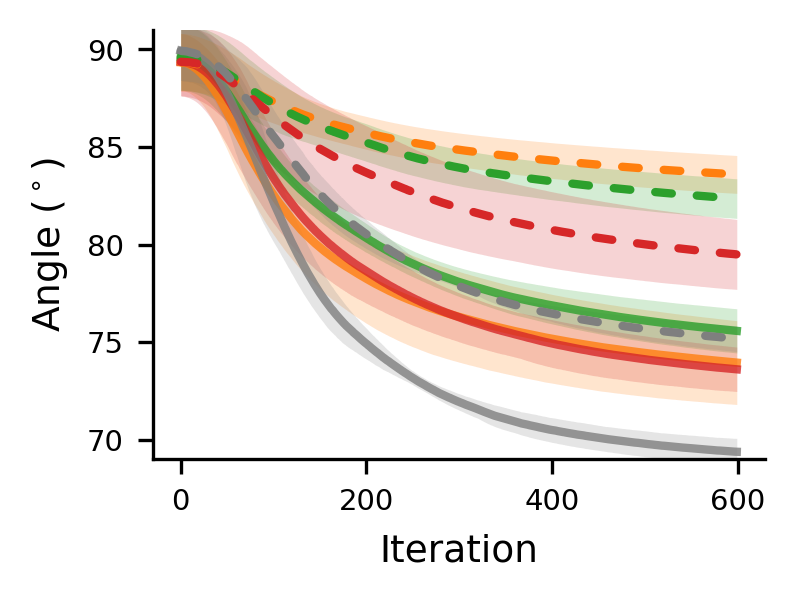

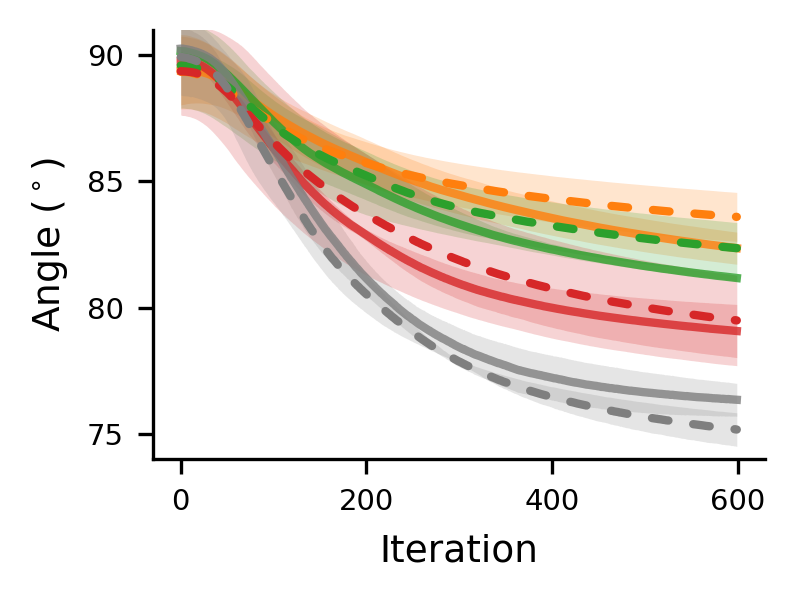

In [ ]:



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/"

str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()






figsize_ = (figure_width2/3.9*190/168/235*190*1.5,figure_width1/1.7/1.1)



linestyle_1 =  (0, (2, 3))
linestyle_2 =  '-'


angle_W_B_1 = Save_dict["angle_W_B"]

print(angle_W_B_1.shape)

angle_dW_BP_FA_1 = Save_dict["angle_W_B"]



angle_W_B_2 = Save_dict["angle_W_B_Linear"]



angle_dW_BP_FA_2 = Save_dict["angle_W_randomB"]


################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


for i in range(1,N_layers):
  x = angle_W_B_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2  , alpha=0.8) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



for i in range(1,N_layers):
  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
plt.ylabel(r"Angle ($^\circ$)", fontsize= plt_fontsize_text_)




# plt.title("Width: 50"    , fontsize= plt_fontsize_text_   )




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)

plt.ylim(69,91)
plt.yticks(list(range(70,95,5)))

plt.savefig( base_directory_figure_str +  'Ignoring_nonlinearity.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 


plt.show()





####################################################################################################################################################################################################
##################################################################################################


plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


for i in range(1,N_layers):
  x = angle_dW_BP_FA_2[i,:,:]

  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 , alpha=0.8) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



for i in range(1,N_layers):
  x = angle_dW_BP_FA_1[i,:,:]

  # x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
plt.ylabel(r"Angle ($^\circ$)", fontsize= plt_fontsize_text_)



# plt.title("Width: 50"    , fontsize= plt_fontsize_text_   )




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)

plt.ylim(74,91)
plt.yticks(list(range(75,95,5)))

plt.savefig( base_directory_figure_str +  'RandomB.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 


plt.show()